In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ishikajohari/best-books-10k-multi-genre-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ACER\.cache\kagglehub\datasets\ishikajohari\best-books-10k-multi-genre-data\versions\2


In [23]:
import pandas as pd

In [24]:
books = pd.read_csv("goodreads_data.csv")
books

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

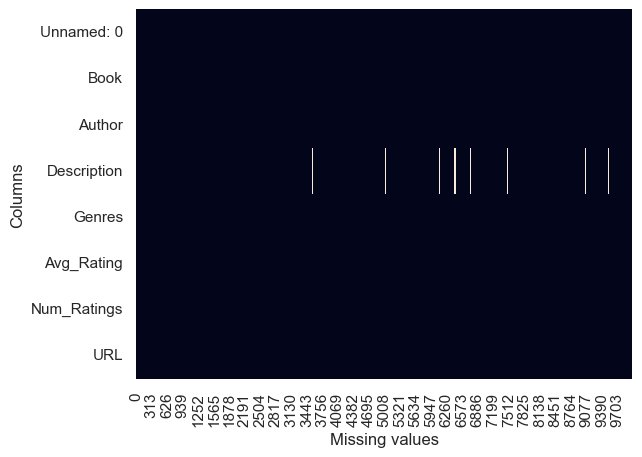

In [26]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Missing values")
plt.ylabel("Columns")

plt.show()

In [27]:
import numpy as np

books["missing description"] = np.where(books["Description"].isna(), 1, 0)

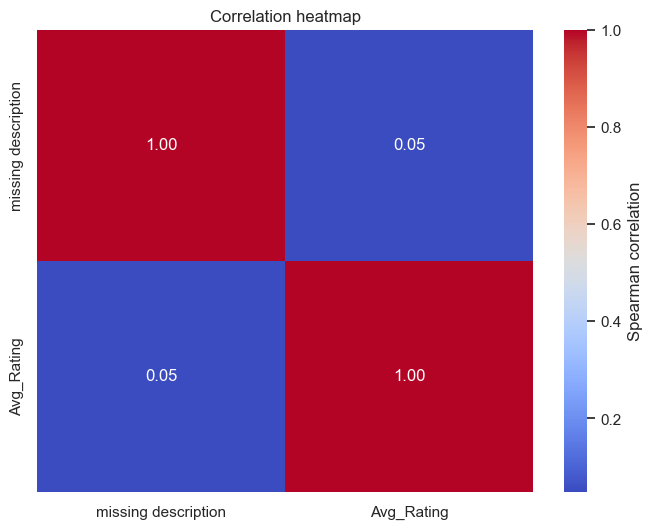

In [28]:
columns_of_interest = ["missing description","Avg_Rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [29]:
book_missing = books[~(books["Description"].isna()) &
      ~(books["Genres"].isna()) &
      ~(books["Avg_Rating"].isna()) &
      ~(books["Num_Ratings"].isna())
]

book_missing

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,missing description
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,0
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,0
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,0
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,0
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,0
...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,0
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,0
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0


In [30]:
book_missing["Genres"].value_counts().reset_index().sort_values("count", ascending=False)


,Genres,count
0,[],923
1,['Fiction'],48
2,['Fantasy'],41
3,['Nonfiction'],21
4,['Romance'],20
...,...,...
8017,"['Historical Fiction', 'Historical']",1
8018,"['Humor', 'Fiction', 'Audiobook', 'German Lite...",1
8019,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",1
8020,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",1


In [31]:
book_missing

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,missing description
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,0
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,0
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,0
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,0
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,0
...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,0
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,0
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0


In [32]:
book_missing["words_in_description"] = book_missing["Description"].str.split().str.len()
book_missing

C:\Users\ACER\AppData\Local\Temp\ipykernel_5732\185739090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["Description"].str.split().str.len()


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,missing description,words_in_description
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,0,137
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,0,43
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,0,100
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,0,166
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,0,123
...,...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,0,147
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0,186
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,0,141
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0,206


In [33]:
book_missing.loc[book_missing["words_in_description"].between(1, 4), "Description"]

1296                        fantasy graphic fiction novel
1709                                 Book by Ryu Murakami
2627    世界各国で200万部突破!有力企業、政府機関、国連、陸軍士官学校、一流アスリートにも指導・講...
2899                                          Old Version
3080                                          سیاست امروز
3108                               Literature and Fiction
3124     豔陽下的謀殺案（克莉絲蒂繁體中文版20週年紀念珍藏16）(Evil Under the Sun)
3188                    Paperback available on Amazon.com
3359                    Legal Thriller, Romantic Suspense
3446                English (translation)Original Russian
3659                               The Magic Faraway Tree
3811                                Book by Hayes, Sherri
3888    1949年にジョージ・オーウェルは、近未来小説としての『1984』を刊行した。そして2009...
4671                                         out of print
5066    36歳未婚女性、古倉恵子。大学卒業後も就職せず、コンビニのバイトは18年目。これまで彼氏なし...
5088                                              Romance
5094                                    Book by Karon Jan
5148          

In [34]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "Description"]

1000                  First in the Black Stallion series.
1045    Librarian Note: Alternate Cover Edition for AS...
1175    This book is in English. This book contains 22...
1195    Excellent condition. Fast shipping. 100% satis...
1226            A small collection of twisted fairy tales
1511              Book with audio cassette The Elvis Tape
1928     Time management strategies for an unlimited life
2172           Alternate cover edition of ASIN B07K8RHCK5
2298                             The fabric of the cosmos
2514               FOR USE IN SCHOOLS AND LIBRARIES ONLY.
2640    The 8th Habit: From Effectiveness to Greatness...
2733    時間も空間も変転する異界の地〈中間世界〉。最後の拳銃使いローランドは、宿敵である〈黒衣の男〉...
2765                   Husband dealing with wife's cancer
2902    Presents tips based on real-life experiences t...
3370    The last of Marlowe's great dramas, often cons...
5011                               Book by Henry, Gary D.
5441    مجموعة حكايات من الأساطير على لسان الحيوانات و...
5595          

In [35]:
book_missing.loc[book_missing["words_in_description"].between(15, 24), "Description"]

227     A collection of quintessentially American poem...
1074    The classic play about Sir Thomas More, the Lo...
1291    Join author Douglas Adams and zoologist Mark C...
1464    This is his magnum opus. It distils his over 4...
1527    Note - This is not the novel by Franz Kafka! F...
                              ...                        
9539    An intense and unsettling view of the future i...
9661    When Edgar runs away from his past, he learns ...
9667    Volume 4 of Halsey Rookmaaker's coming of age ...
9774    An Anthology of Writing, Photography and Art--...
9986    This book is about the corrilation which exist...
Name: Description, Length: 76, dtype: object

In [36]:
book_missing.loc[book_missing["words_in_description"].between(25, 50), "Description"]

1       Harry Potter thinks he is an ordinary boy - un...
17      At the age of twelve, Jonas, a young boy from ...
31      Scarlett O'Hara, the beautiful, spoiled daught...
32      An Award or Presentation Bible in the King Jam...
37      A nineteenth-century boy from a Mississippi Ri...
                              ...                        
9938    We Look For Magic and Feed the Hungry is an en...
9946    Blakely was just your average girl until news ...
9958    "A superb book." (New York Daily News)On the e...
9964    The story of four very special people and the ...
9992    "Suzy Kassem is an American writer, poet, phil...
Name: Description, Length: 507, dtype: object

In [37]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 30]
book_missing_25_words

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,missing description,words_in_description
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,0,137
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,0,43
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,0,100
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,0,166
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,0,123
...,...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,0,147
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0,186
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,0,141
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0,206


In [38]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["Unnamed: 0","Description"]].astype(str).agg(" ".join, axis=1)
book_missing_25_words

C:\Users\ACER\AppData\Local\Temp\ipykernel_5732\320744796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"] = book_missing_25_words[["Unnamed: 0","Description"]].astype(str).agg(" ".join, axis=1)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,missing description,words_in_description,tagged_description
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...,0,137,0 The unforgettable novel of a childhood in a ...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...,0,43,1 Harry Potter thinks he is an ordinary boy - ...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...,0,100,"2 Since its immediate success in 1813, Pride a..."
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...,0,166,3 Discovered in the attic in which she spent t...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...,0,123,4 Librarian's note: There is an Alternate Cove...
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,0,147,9995 How far would you go? If human society wa...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...,0,186,9996 Jeth Cavanaugh is searching for a new lif...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,0,141,9997 This dark fable tells the story of four E...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...,0,206,9998 For Adriana Monroe life couldn’t get any ...


In [39]:
book_missing_25_words.drop(["missing description", "words_in_description"], axis =1).to_csv("book_cleaned.csv", index = False)